# Credit Risk Prediction

In this project, we will create machine learning models that can predict the possibility of a loss happening due to a borrower's failure to repay a loan or to satisfy contractual obligations.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
loan_data = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\noudi\AppData\Local\Temp\ipykernel_7140\3065919225.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data_2007_2014.csv')


In [3]:
# Investigating Data Set
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [5]:
# Check the number of rows
len(loan_data)

466285

### Define Target Variable

Target Variable is the feature of a dataset about which we want to gain a deeper understanding and learn patterns between the dataset.

In [6]:
# Define target variable
# In this dataset 'loan_status' is the target variable
loan_data.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Because the goal is to predict whether the loans is risky or not, we need to see data of each loans hystorically. 
In this dataset, we can see that in loan_status columns. Then, we can classify them as follows:

(This classification depends on the regulations of the lending company)
    
    • Good loans : 'Current', 'Fully Paid', ''Does not meet the credit policy. Status:Fully Paid'
    • Bad loans  : 'Charged Off', 'Late (31-120 days)',  'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet
                    the credit policy. Status:Charged Off'

In [7]:
# Define values, classify good loans based on the dataset
good_loans = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

In [8]:
# Classify the types of loans
loan_data['loan_types'] = np.where(loan_data['loan_status'].isin(good_loans), 1, 0)

<Axes: title={'center': 'Good vs Bad Loans'}>

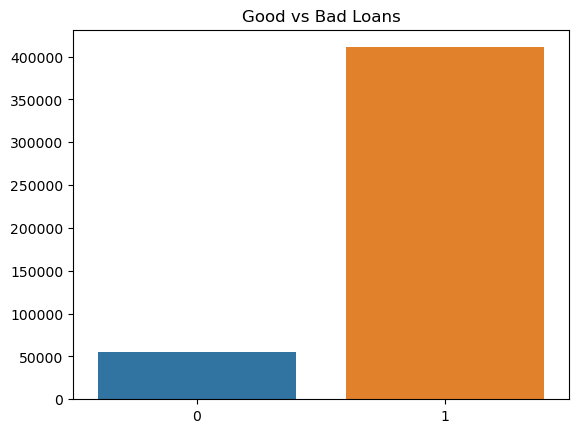

In [9]:
# Visualize the comparison
plt.title('Good vs Bad Loans')
sns.barplot(x=loan_data.loan_types.value_counts().index,y=loan_data.loan_types.value_counts().values)

### Feature engineering & Feature Selection 

What we need to do:
    
    • Checking the dataset for missing values, duplicate, inconsistent columns and etc.
        
        After that, we can do this following:
        
        • Drop identities columns (which have each unique values but irrelevant)
        • Drop columns that contain >50% missing values.
        • Drop columns that only have 1 unique values.
        • Drop columns that contain data leakage.
        • Drop columns that have similar values (Check the correlation).

In [10]:
# Check information about the DataFrame.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [11]:
# Drop irrelevant columns
drop_identities = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'sub_grade', 'emp_title', 'url', 'title']
loan_data.drop(columns=drop_identities, axis=1, inplace=True)

In [12]:
# Get columns that have more than 50% missing values
na_values = loan_data.isnull().mean()
na_values[na_values>0.5]

mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [13]:
# Filtering data with less than 2 unique values
loan_data.nunique()[loan_data.nunique() < 2].sort_values()

mths_since_rcnt_il           0
inq_fi                       0
all_util                     0
max_bal_bc                   0
open_rv_24m                  0
open_rv_12m                  0
il_util                      0
total_bal_il                 0
total_cu_tl                  0
inq_last_12m                 0
open_il_12m                  0
open_il_6m                   0
open_acc_6m                  0
verification_status_joint    0
dti_joint                    0
annual_inc_joint             0
open_il_24m                  0
application_type             1
policy_code                  1
dtype: int64

In [14]:
# Drop the irrelevant columns
drop_col = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint'
            , 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
           'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
           'inq_last_12m', 'max_bal_bc', 'application_type', 'policy_code']
loan_data.drop(columns=drop_col, axis=1, inplace=True)

### Data Leakage 

One of the common pitfalls when building a machine learning model is Data Leakage. Usually the target leakage will have much higher feature importance. 

In this dataset the example of target leakage is 'out_prncp', when'out_prncp' column has 0 value, it means the loan is already fully paid. The result of this column will be super accurate because it's already happened, the loan is already paid, but this data is not relevant to predict a new borrower so it will be unfair. This kind of variable will create overly optimistic models that are practically useless and cannot be used in production.

Hence, the columns that contain Data Leakage will be drop.

In [15]:
# Drop columns that contain data leakage
leakage_col = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

loan_data.drop(columns=leakage_col, axis=1, inplace=True)

C:\Users\noudi\AppData\Local\Temp\ipykernel_7140\2526666169.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})


<Axes: >

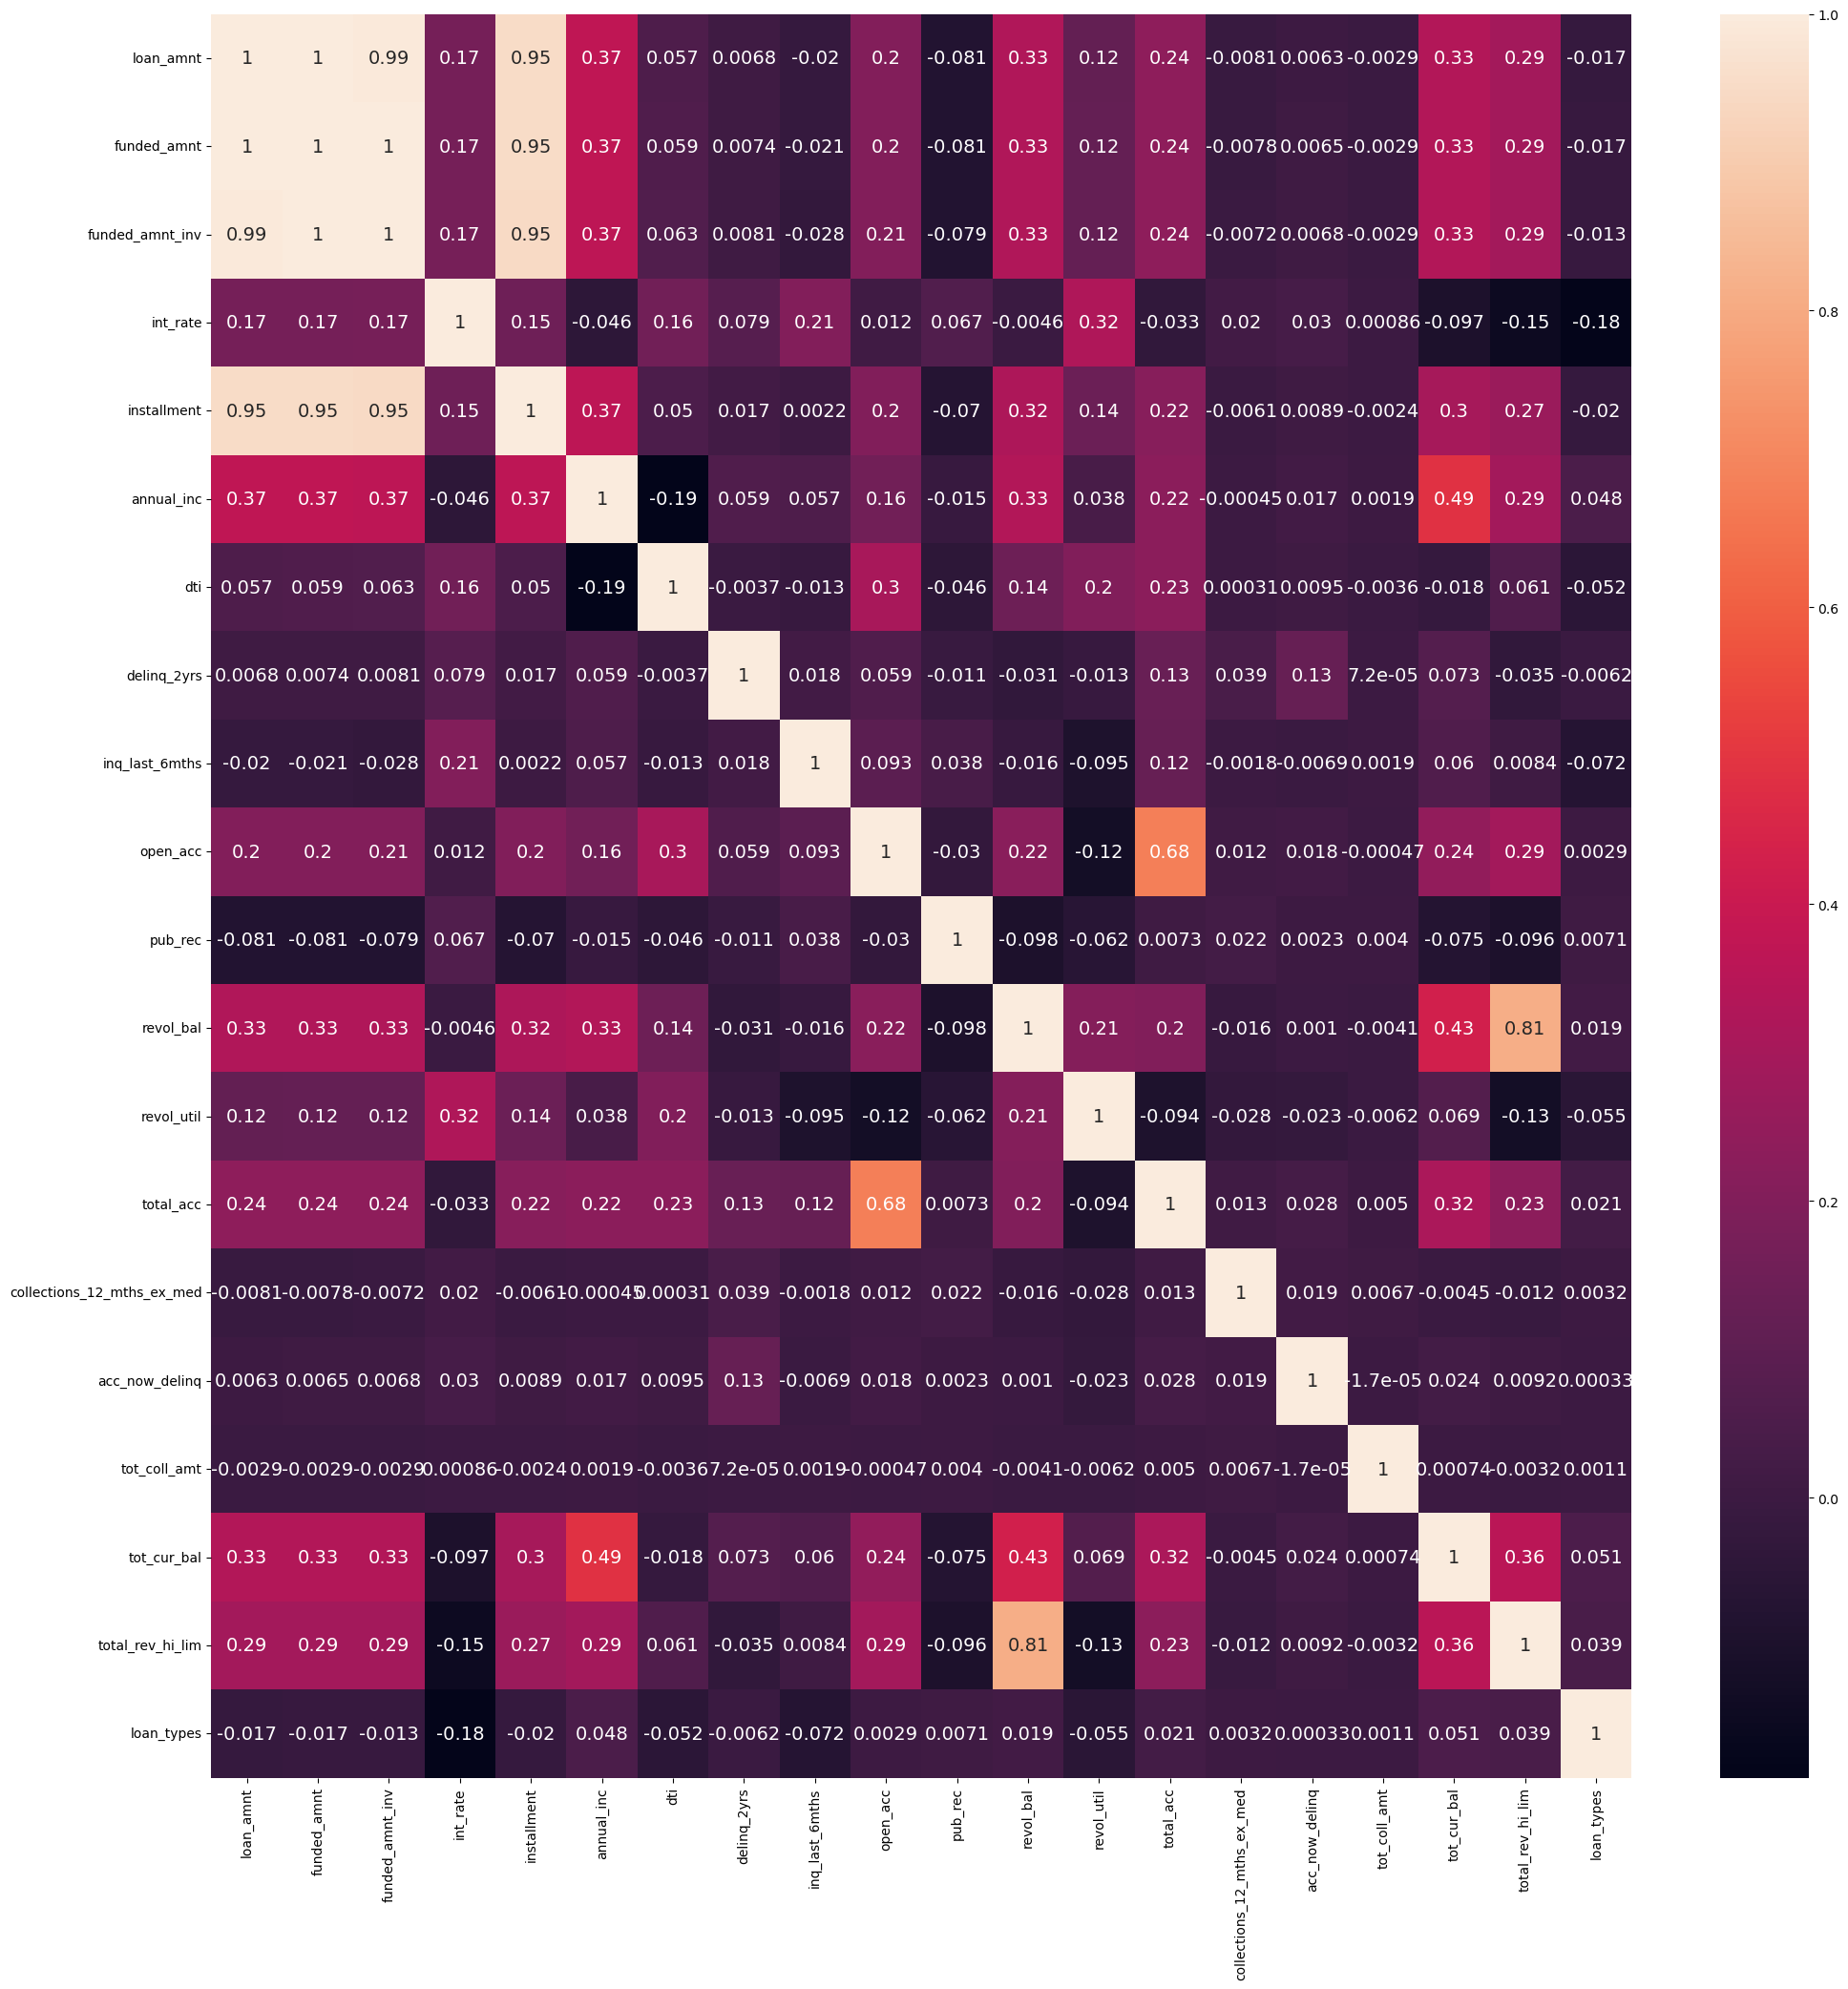

In [16]:
#Check correlation
plt.figure(figsize=(24,24))
sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})

From this heatmap, we can see the columns that are similar with each other. 

In [17]:
# Checking similar columns
loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888
std,8286.509164,8274.371300,8297.637788
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,12000.000000,12000.000000,12000.000000
75%,20000.000000,20000.000000,19950.000000
max,35000.000000,35000.000000,35000.000000


In [18]:
# Drop 2 of the similar columns
loan_data.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

Check the Missing Values again.

In [19]:
#Checking for missing values
loan_data.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
total_rev_hi_lim            

Check the collumns that have the same number of missing values.

In [20]:
# Check tot_coll_amt, tot_cur_bal, total_rev_hi_lim
tot_cols = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
loan_data[tot_cols].sample(10)

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
281862,0.0,384247.0,22000.0
85532,0.0,193409.0,192100.0
236377,0.0,69571.0,38700.0
47059,0.0,29602.0,47700.0
180345,89.0,66056.0,15200.0
233177,0.0,18507.0,51200.0
188374,0.0,100243.0,21900.0
414511,0.0,331203.0,13500.0
319889,0.0,320876.0,24400.0
160724,0.0,13850.0,19700.0


In [21]:
loan_data[tot_cols].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.919135e+02,1.388017e+05,3.037909e+04
std,1.463021e+04,1.521147e+05,3.724713e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.861800e+04,1.350000e+04
50%,0.000000e+00,8.153900e+04,2.280000e+04
75%,0.000000e+00,2.089530e+05,3.790000e+04
max,9.152545e+06,8.000078e+06,9.999999e+06


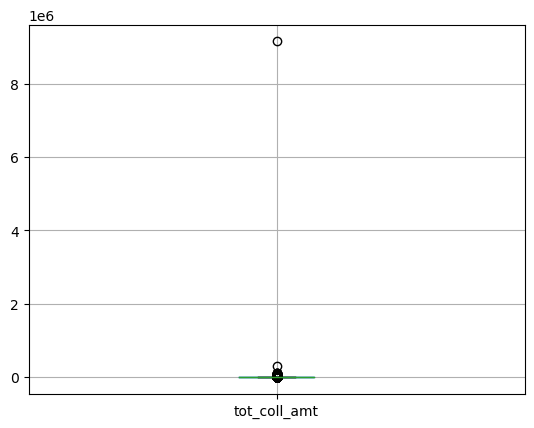

In [22]:
# Visualize data distribution of each columns
loan_data.boxplot(column=['tot_coll_amt'])
plt.show()

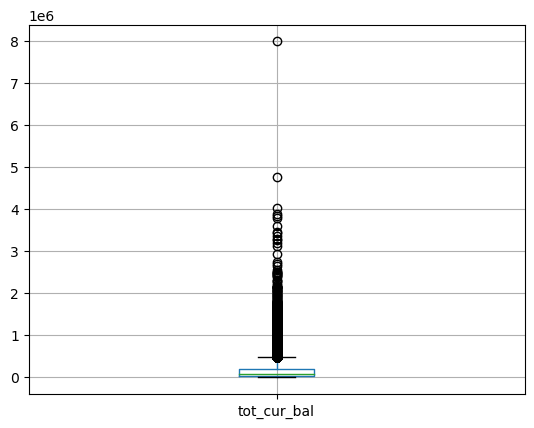

In [23]:
loan_data.boxplot(column=['tot_cur_bal'])
plt.show()

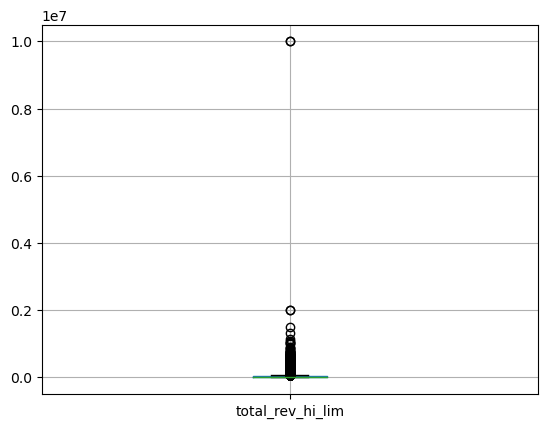

In [24]:
loan_data.boxplot(column=['total_rev_hi_lim'])
plt.show()

Conclusion:
- The description of these columns are rather vague
- Total missing value is 70276
- The rows that contain missing values in those columns will be dropped

In [25]:
# Drop all rows that contain missing value from tot_coll_amt, tot_cur_bal, total_rev_hi_lim columns
loan_data.dropna(subset = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace = True)

In [26]:
# Reset index
loan_data.reset_index(drop= True, inplace = True)

Check the data with less than 10 unique values.

In [27]:
# Filtering data with less than 10 unique values
loan_data.nunique()[loan_data.nunique() < 10].sort_values()

term                          2
initial_list_status           2
loan_types                    2
verification_status           3
home_ownership                6
acc_now_delinq                6
grade                         7
inq_last_6mths                9
collections_12_mths_ex_med    9
dtype: int64

In [28]:
def risk_pct(x):
    ratio = (loan_data.groupby(x)['loan_types'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('risky (%)') # rename column as percent
         .reset_index())

    sns.lineplot(data=ratio[ratio['loan_types'] == 0], x=x, y='risky (%)')
    plt.title(x)
    plt.show()

In [29]:
print(loan_data.nunique()[loan_data.nunique() < 12].sort_values().index)

Index(['term', 'initial_list_status', 'loan_types', 'verification_status',
       'home_ownership', 'acc_now_delinq', 'grade', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'emp_length'],
      dtype='object')


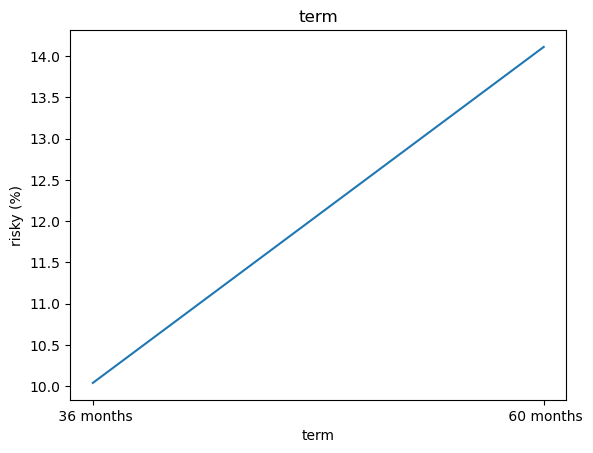

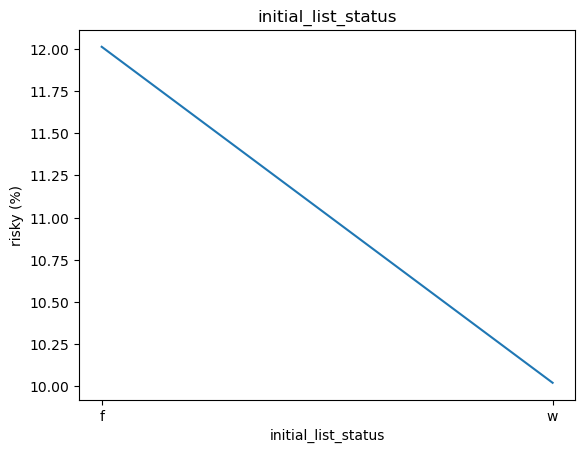

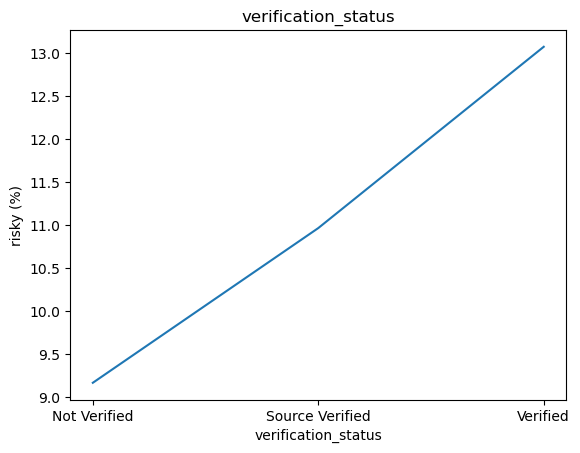

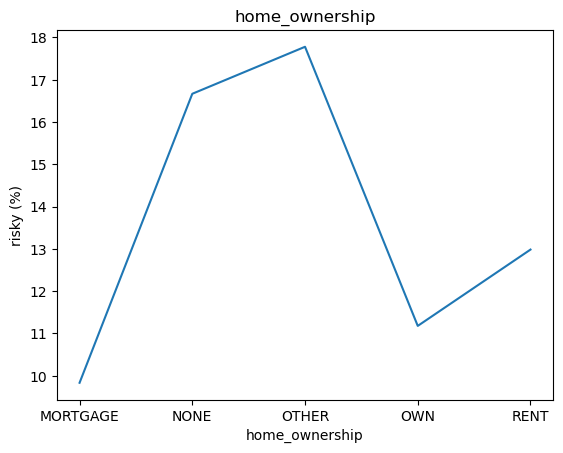

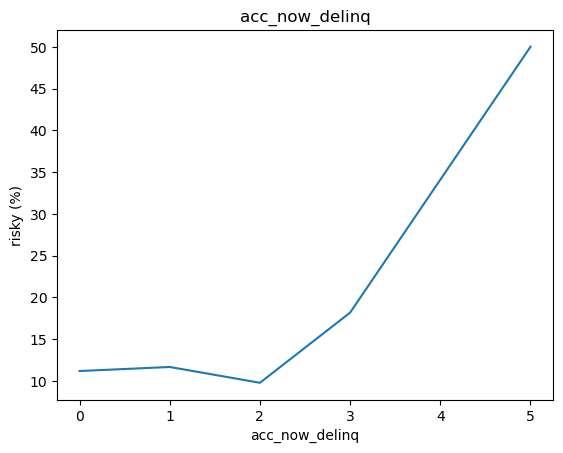

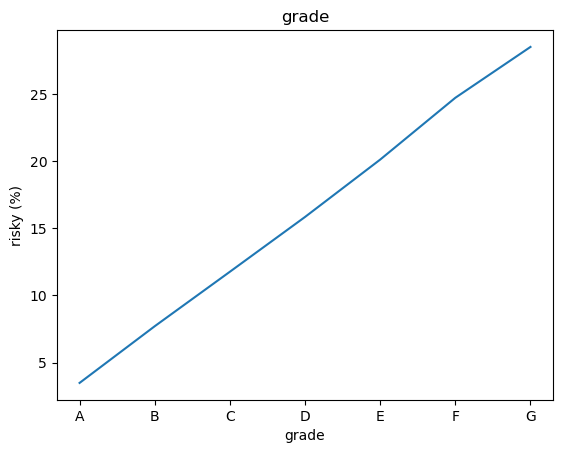

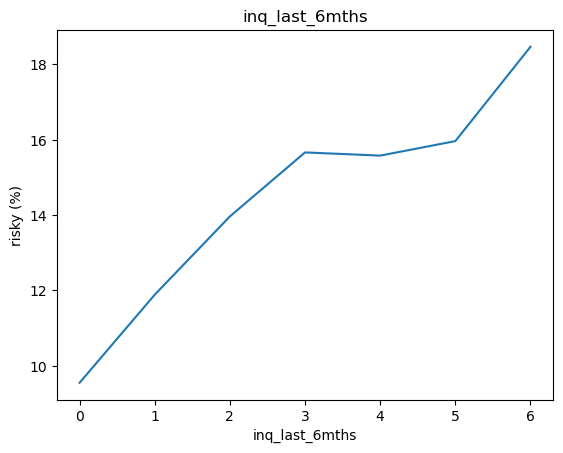

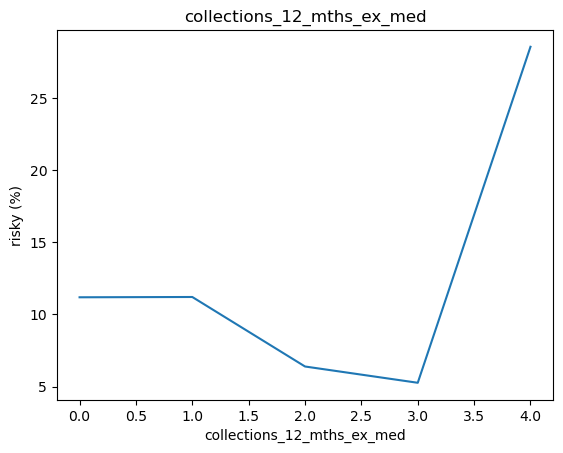

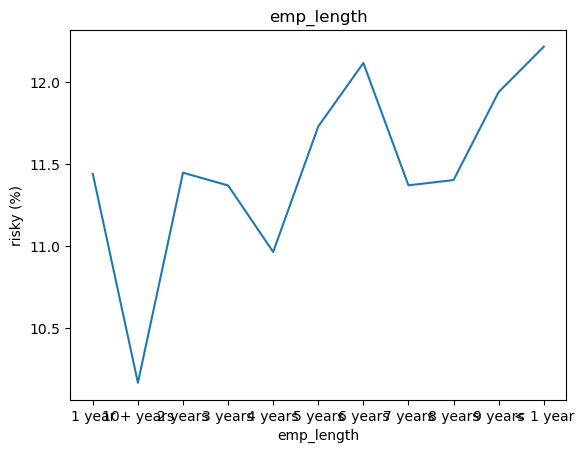

In [30]:
#unique columns and months date column
unique_cols = ['term', 'initial_list_status', 'verification_status',
       'home_ownership', 'acc_now_delinq', 'grade', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'emp_length']
for cols in unique_cols:
    risk_pct(cols)

In [31]:
# Check columns with numerical data type
num_dtype = loan_data.select_dtypes(exclude= 'object')
num_dtype.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_types'],
      dtype='object')

In [32]:
# Check columns with string data type
num_dtype = loan_data.select_dtypes(include= 'object')
num_dtype.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d'],
      dtype='object')

The following columns should be modified because they don't have appropriate data types.

In [33]:
mod_cols = ['term', 'emp_length', 'earliest_cr_line', 'last_credit_pull_d']
loan_data[mod_cols]

,term,emp_length,earliest_cr_line,last_credit_pull_d
0,36 months,10+ years,Oct-86,Dec-15
1,36 months,1 year,Jan-07,Jan-16
2,36 months,10+ years,Mar-94,Jan-16
3,36 months,10+ years,Oct-98,Jan-16
4,36 months,2 years,Mar-98,Jan-16
...,...,...,...,...
396004,60 months,4 years,Apr-03,Jan-16
396005,60 months,10+ years,Jun-97,Jan-16
396006,60 months,7 years,Dec-01,Dec-15
396007,36 months,3 years,Feb-03,Apr-15


In [34]:
# Convert 'term' column to numerical datatype and replace months with empty string
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term']

0         36
1         36
2         36
3         36
4         36
          ..
396004    60
396005    60
396006    60
396007    36
396008    36
Name: term, Length: 396009, dtype: int64

In [35]:
# Check unique values of 'emp_length' column
loan_data['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [36]:
# Change 'emp_map' to int data type
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

loan_data['emp_length'] = loan_data['emp_length'].map(emp_map).fillna('0').astype(int)
loan_data['emp_length'].unique()

array([10,  1,  2,  4,  3,  7,  5,  6,  9,  8,  0])

In [37]:
# Displays 'earliest_cr_line' column
loan_data['earliest_cr_line']

0         Oct-86
1         Jan-07
2         Mar-94
3         Oct-98
4         Mar-98
           ...  
396004    Apr-03
396005    Jun-97
396006    Dec-01
396007    Feb-03
396008    Feb-00
Name: earliest_cr_line, Length: 396009, dtype: object

In [38]:
# Convert to date data type & assign them into new column
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [39]:
# Assuming we are in January 2016, Calculate the months between 2 dates and change them to num data type
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-01-30') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [40]:
loan_data['mths_since_earliest_cr_line'].describe()

count    396009.000000
mean        216.898512
std          95.101534
min        -634.000000
25%         160.000000
50%         202.000000
75%         263.000000
max         565.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [41]:
# Check variable that have (-) value
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
628,Oct-68,2068-10-01,-632.0
843,Aug-67,2067-08-01,-618.0
1021,Jul-67,2067-07-01,-617.0
1740,Apr-68,2068-04-01,-626.0
3645,Jan-61,2061-01-01,-539.0
...,...,...,...
393727,Jan-68,2068-01-01,-623.0
393984,Jul-66,2066-07-01,-605.0
394824,Oct-67,2067-10-01,-620.0
395224,Sep-67,2067-09-01,-619.0


In [42]:
# Replace the year 20.. to 19..
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line_date'].astype(str)
loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0].str.replace('20','19')

C:\Users\noudi\AppData\Local\Temp\ipykernel_7140\2730618207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0].str.replace('20','19')


In [43]:
loan_data['earliest_cr_line_date'][843]

'1967-08-01'

In [44]:
# Change to date data type
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line_date'])
loan_data['earliest_cr_line_date']

0        1986-10-01
1        2007-01-01
2        1994-03-01
3        1998-10-01
4        1998-03-01
            ...    
396004   2003-04-01
396005   1997-06-01
396006   2001-12-01
396007   2003-02-01
396008   2000-02-01
Name: earliest_cr_line_date, Length: 396009, dtype: datetime64[ns]

In [45]:
loan_data['mths_since_earliest_cr_line']

0         352.0
1         109.0
2         263.0
3         208.0
4         215.0
          ...  
396004    154.0
396005    224.0
396006    170.0
396007    156.0
396008    192.0
Name: mths_since_earliest_cr_line, Length: 396009, dtype: float64

In [46]:
# Check the data again (Assuming we're in Jan 2016)
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-01-30') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_earliest_cr_line'].describe()

count    396009.000000
mean        220.040865
std          87.849670
min          51.000000
25%         161.000000
50%         203.000000
75%         264.000000
max         865.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [47]:
loan_data.drop(columns = ['earliest_cr_line_date' , 'earliest_cr_line'], inplace = True)

In [48]:
loan_data['last_credit_pull_d']

0         Dec-15
1         Jan-16
2         Jan-16
3         Jan-16
4         Jan-16
           ...  
396004    Jan-16
396005    Jan-16
396006    Dec-15
396007    Apr-15
396008    Jan-16
Name: last_credit_pull_d, Length: 396009, dtype: object

In [49]:
# Change to date data type and fill NaN data with max date
loan_data['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'], format = '%b-%y').fillna(pd.to_datetime("2016-01-30"))

In [50]:
# Calculate the months between 2 dates and change them to num data type
loan_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-01-30') - loan_data['last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [51]:
loan_data['mths_since_last_credit_pull_d'].describe()

count    396009.000000
mean          3.105657
std           5.213863
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          42.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [52]:
# Drop column last_credit_pull_d 
loan_data.drop(columns = ['last_credit_pull_d'], inplace = True)

After the columns have fitting data types, we can check the missing values again.

In [53]:
#Checking for missing values
loan_data.isnull().sum()

loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
purpose                            0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       219
total_acc                          0
initial_list_status                0
collections_12_mths_ex_med         0
acc_now_delinq                     0
tot_coll_amt                       0
tot_cur_bal                        0
total_rev_hi_lim                   0
loan_types                         0
m

In [54]:
loan_data.drop(columns ='zip_code', inplace = True)

In [55]:
# Drop rows that contain missing value
loan_data.dropna(subset = ['revol_util'], inplace = True)
loan_data.reset_index(drop= True, inplace = True)

In [56]:
#Checking for missing values
missing_value = loan_data.isnull().sum()
missing_value[missing_value>0]

Series([], dtype: int64)

In [57]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395790 entries, 0 to 395789
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      395790 non-null  int64  
 1   term                           395790 non-null  int64  
 2   int_rate                       395790 non-null  float64
 3   installment                    395790 non-null  float64
 4   grade                          395790 non-null  object 
 5   emp_length                     395790 non-null  int32  
 6   home_ownership                 395790 non-null  object 
 7   annual_inc                     395790 non-null  float64
 8   verification_status            395790 non-null  object 
 9   purpose                        395790 non-null  object 
 10  addr_state                     395790 non-null  object 
 11  dti                            395790 non-null  float64
 12  delinq_2yrs                   

C:\Users\noudi\AppData\Local\Temp\ipykernel_7140\2526666169.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})


<Axes: >

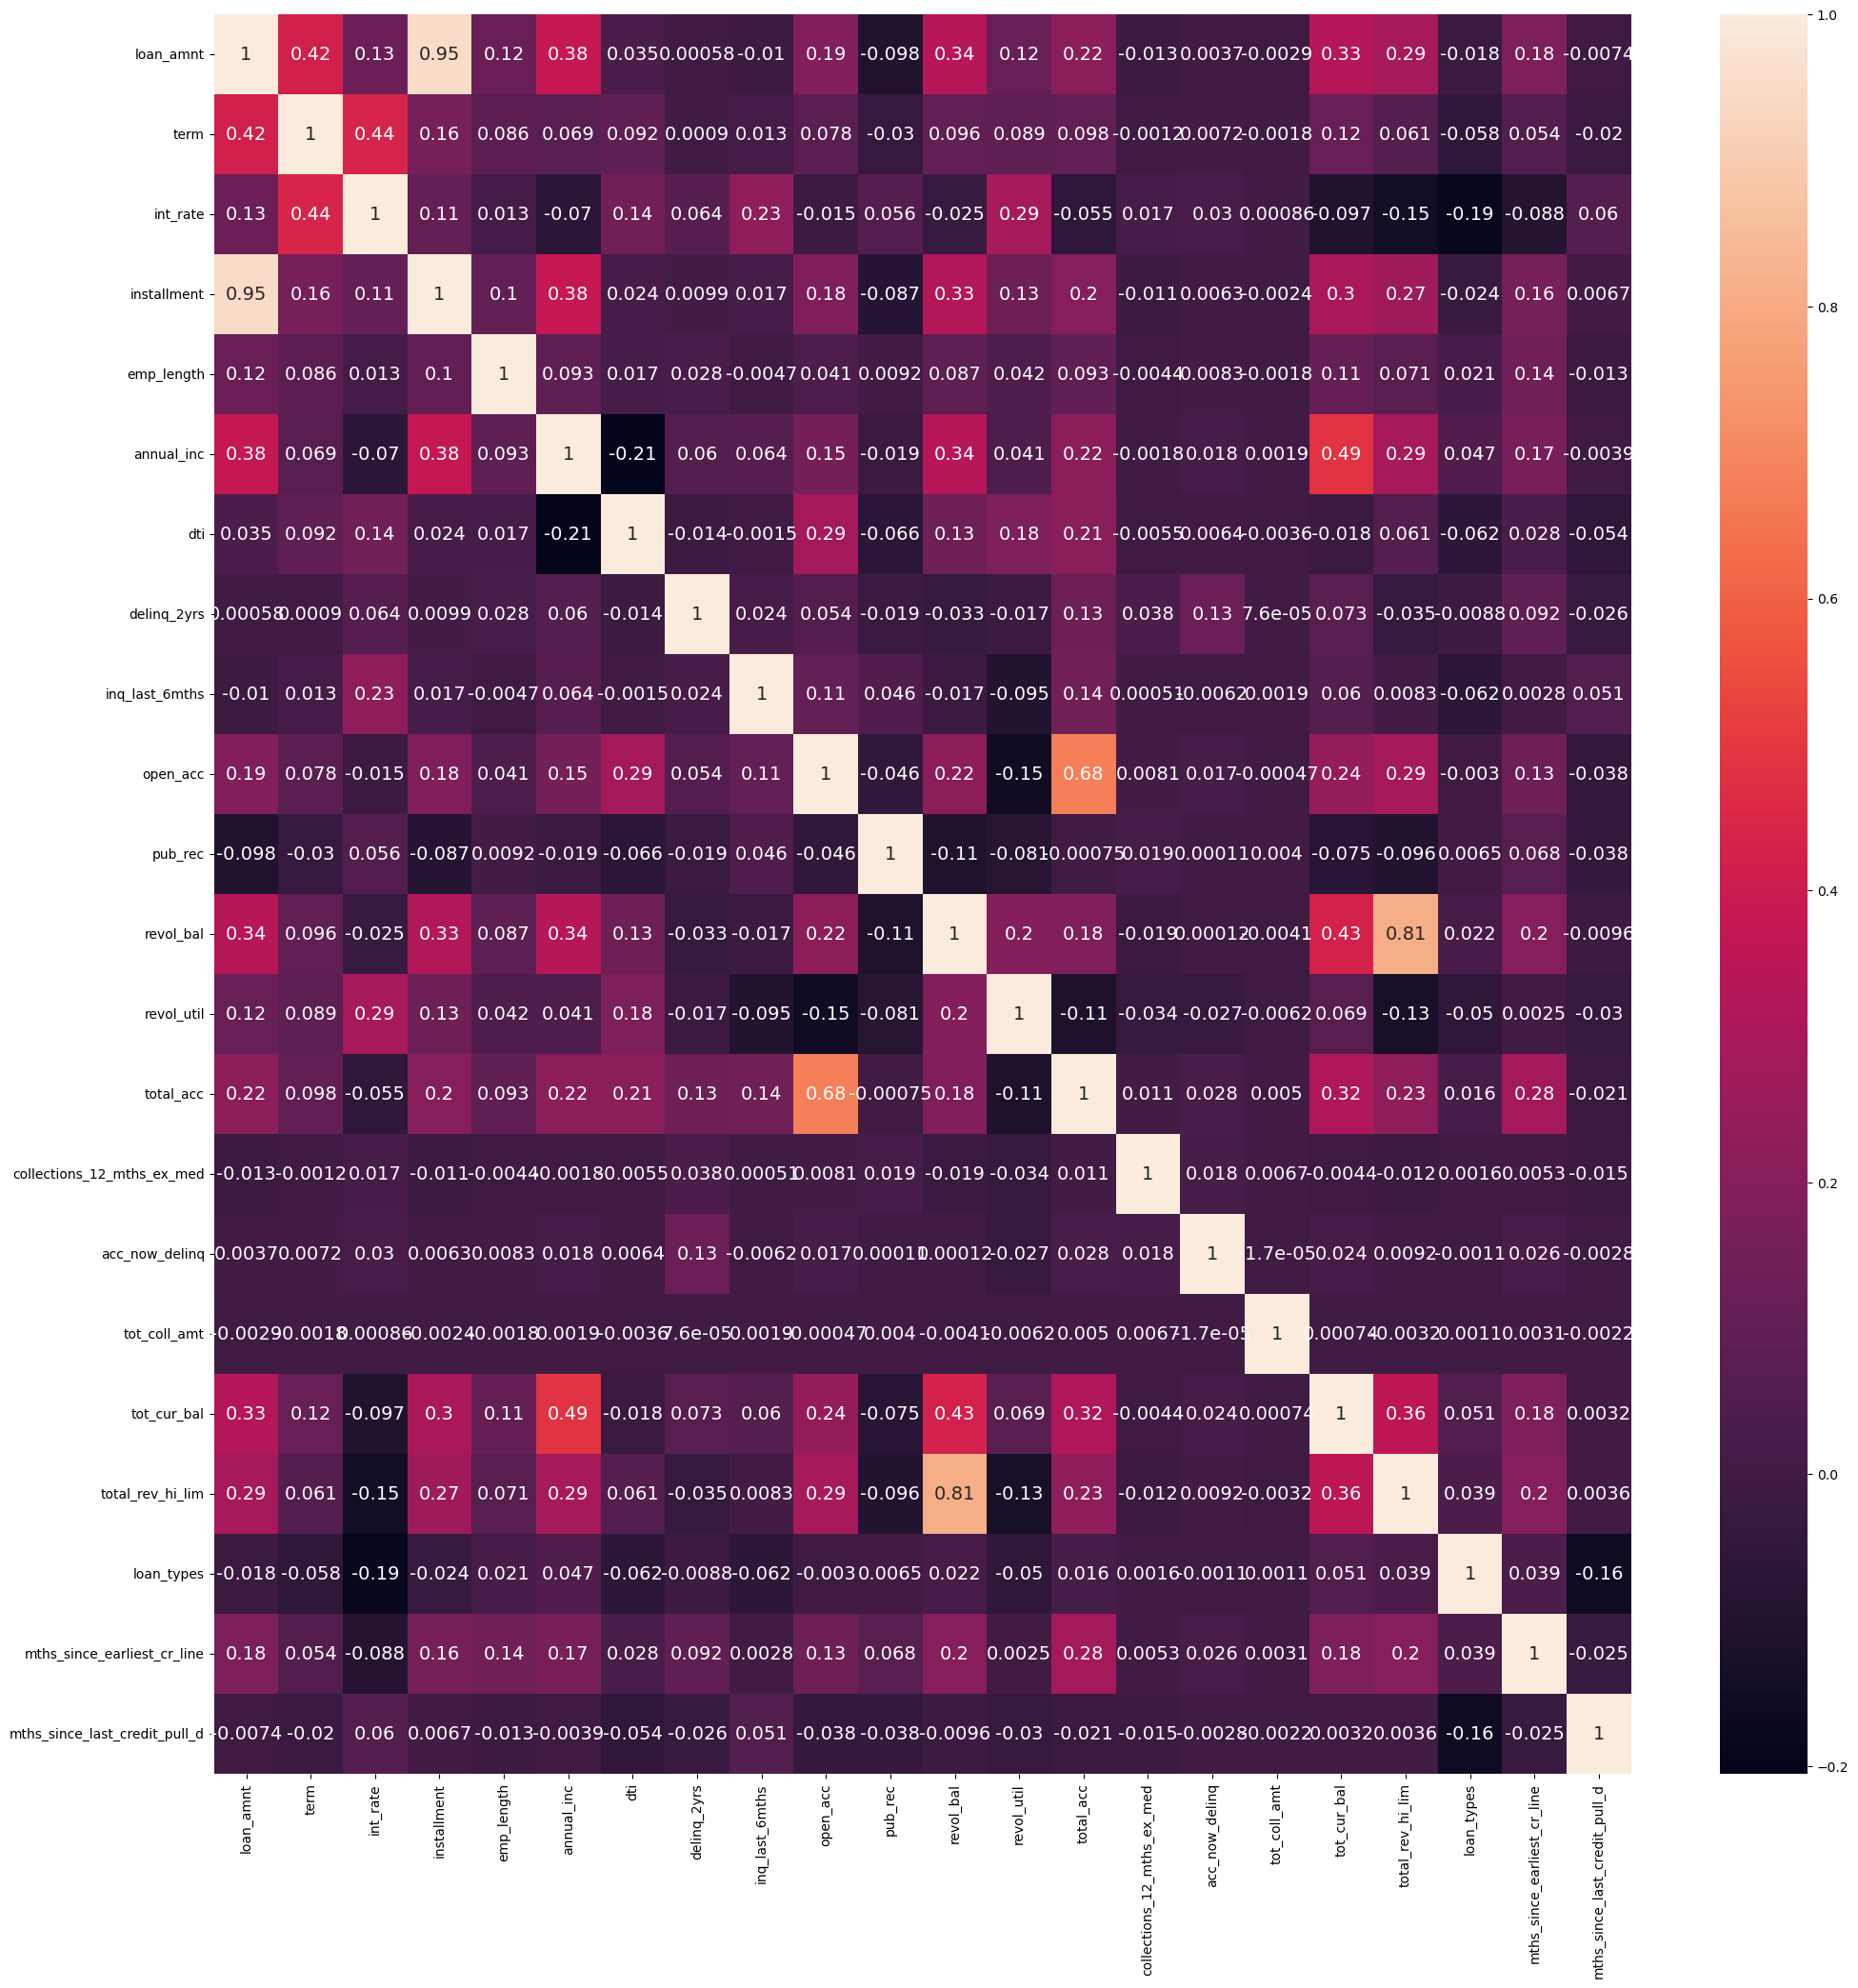

In [58]:
#Check correlation
plt.figure(figsize=(24,24))
sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})

### One Hot Encoding

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.
This technique can improve model performance by providing more information to the model about the categorical variable.

In [59]:
# Convert categorical columns with One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
cat_cols = [col for col in loan_data.select_dtypes(include='object').columns.tolist()]
onehot_cols = pd.get_dummies(loan_data[cat_cols], drop_first=True)

In [60]:
onehot_cols

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395785,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
395786,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
395787,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395788,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Standardization

Standardization entails scaling data to fit a standard normal distribution.

A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1

In [61]:
# All numeric columns are standardized with StandardScaler
from sklearn.preprocessing import StandardScaler

num_cols = [col for col in loan_data.columns.tolist() if col not in cat_cols + ['loan_types']]
ss = StandardScaler()
std_cols = pd.DataFrame(ss.fit_transform(loan_data[num_cols]), columns=num_cols)

In [62]:
std_cols

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_last_credit_pull_d
0,1.482304,-0.628484,-0.699079,1.806077,1.103795,-0.348742,0.652418,-0.369343,-0.748128,0.508315,...,0.958852,0.187888,0.126859,-0.090792,-0.063207,-0.013114,-0.157387,0.792444,1.502075,-0.211953
1,-0.600984,-0.628484,-0.016149,-0.459988,-1.286424,-0.879818,0.938065,-0.369343,-0.748128,0.110319,...,-0.411000,-0.178038,0.213154,-0.090792,-0.063207,-0.013114,-0.819722,-0.410481,-1.263790,-0.403795
2,-0.330036,-0.628484,-1.697208,-0.315117,1.103795,0.566906,-0.467318,-0.369343,0.216907,0.110319,...,-0.162505,-1.537192,-0.304615,-0.090792,-0.063207,-0.013114,0.847596,0.824665,0.489063,-0.403795
3,-0.330036,-0.628484,-0.118931,-0.155313,1.103795,-0.623436,-0.100420,-0.369343,-0.748128,-0.884670,...,-0.525429,0.518964,0.558333,-0.090792,-0.063207,1.038259,-0.823129,-0.598438,-0.136956,-0.403795
4,0.031228,-0.628484,-1.176445,0.127371,-1.020844,-0.202238,-0.155011,-0.369343,-0.748128,-0.685672,...,-0.245496,0.754202,0.299449,-0.090792,-0.063207,0.090342,0.879466,-0.402426,-0.057281,-0.403795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395785,0.440660,1.591130,0.095770,-0.051758,-0.489684,0.658471,0.269017,-0.369343,1.181941,1.304307,...,0.317189,0.902315,0.903513,-0.090792,-0.063207,-0.013114,1.027479,-0.013086,-0.751593,-0.403795
395786,0.874177,1.591130,1.351996,0.563089,1.103795,0.072456,0.091281,-0.369343,4.077043,1.304307,...,0.079731,-0.461195,0.385744,-0.090792,-0.063207,-0.013114,0.546283,0.241998,0.045159,-0.403795
395787,0.717629,1.591130,0.671350,0.283442,0.307055,-0.513559,1.005351,-0.369343,1.181941,1.304307,...,-0.472108,-0.252094,1.507577,-0.090792,-0.063207,-0.013114,-0.428579,-0.464183,-0.569478,-0.211953
395788,-1.534248,-0.628484,-1.404850,-1.570003,-0.755264,0.164021,-1.566742,3.227338,0.216907,1.901301,...,-0.246786,-1.541549,0.126859,-0.090792,-0.063207,-0.013114,2.978176,0.609857,-0.728828,1.322784


### Final Data

Get the final data by combining it all.

In [63]:
# Get final data
final_data = pd.concat([onehot_cols, std_cols, loan_data[['loan_types']]], axis=1)
final_data.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_last_credit_pull_d,loan_types
0,1,0,0,0,0,0,0,0,0,1,...,0.187888,0.126859,-0.090792,-0.063207,-0.013114,-0.157387,0.792444,1.502075,-0.211953,1
1,0,1,0,0,0,0,0,0,0,0,...,-0.178038,0.213154,-0.090792,-0.063207,-0.013114,-0.819722,-0.410481,-1.263790,-0.403795,1
2,0,0,0,0,0,0,1,0,0,0,...,-1.537192,-0.304615,-0.090792,-0.063207,-0.013114,0.847596,0.824665,0.489063,-0.403795,1
3,1,0,0,0,0,0,0,0,0,0,...,0.518964,0.558333,-0.090792,-0.063207,1.038259,-0.823129,-0.598438,-0.136956,-0.403795,1
4,0,0,0,0,0,0,1,0,0,0,...,0.754202,0.299449,-0.090792,-0.063207,0.090342,0.879466,-0.402426,-0.057281,-0.403795,1


In [64]:
final_data.loan_types.value_counts()

1    351500
0     44290
Name: loan_types, dtype: int64

<Axes: title={'center': 'Good vs Bad Loans'}>

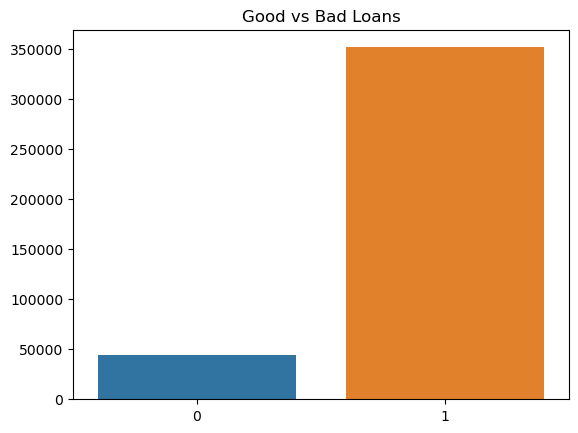

In [65]:
# Checking class imbalance with final data
plt.title('Good vs Bad Loans')
sns.barplot(x=final_data.loan_types.value_counts().index,y=final_data.loan_types.value_counts().values)

### Data Splitting

We can split the data to easily evaluate the performance of our model. Such as, if it performs well with the training data, but does not perform well with the test dataset, then it is estimated that the model may be overfitted.

Split data into train and test, with a comparison of 80% for training data and 20% for testing data. 

In [66]:
# Data Splitting
X = final_data.drop('loan_types', axis = 1)
y = final_data['loan_types']

In [67]:
# Spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
X_train.shape, X_test.shape

((316632, 96), (79158, 96))

In [69]:
# Checking  imbalance for training dataset
y_train.value_counts()

1    281200
0     35432
Name: loan_types, dtype: int64

### Oversampling Minority Class to Resolve Class Imbalance

We can see above that our data is imbalanced, so we can do oversampling for the minority class.

In [70]:
# Oversampling Minority Class
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#check value counts before and after oversampling
print('Before OverSampling:\n{}'.format(y_train.value_counts()))
print('\nAfter OverSampling:\n{}'.format(y_train_ros.value_counts()))

Before OverSampling:
1    281200
0     35432
Name: loan_types, dtype: int64

After OverSampling:
1    281200
0    281200
Name: loan_types, dtype: int64


### Train the Model

In [71]:
# Import Library
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

1. Logistic Regression

In [72]:
# Logistic Regression
# Building Model
LR_ros= LogisticRegression(max_iter=600)  
LR_ros.fit(X_train_ros, y_train_ros)

# Predicting
y_pred_LR_ros = LR_ros.predict(X_test)

# Classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1912    0.6417    0.2946      8858
   good loan     0.9358    0.6579    0.7726     70300

    accuracy                         0.6561     79158
   macro avg     0.5635    0.6498    0.5336     79158
weighted avg     0.8525    0.6561    0.7191     79158



2. Random Forest

In [73]:
# Random Forest
# Building model
rf_ros = RandomForestClassifier(max_depth=10, n_estimators=20)
rf_ros.fit(X_train_ros, y_train_ros)

# Predicting
y_pred_rf_ros = rf_ros.predict(X_test)

# Classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rf_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1963    0.6308    0.2994      8858
   good loan     0.9355    0.6746    0.7839     70300

    accuracy                         0.6697     79158
   macro avg     0.5659    0.6527    0.5417     79158
weighted avg     0.8528    0.6697    0.7297     79158



3. Decision Tree

In [74]:
# Decision Tree
# Building model
dt_ros = DecisionTreeClassifier(max_depth = 10)
dt_ros.fit(X_train_ros, y_train_ros)

# Predicting
y_pred_dt_ros = dt_ros.predict(X_test)

# Classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_dt_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1989    0.6308    0.3024      8858
   good loan     0.9360    0.6798    0.7876     70300

    accuracy                         0.6744     79158
   macro avg     0.5674    0.6553    0.5450     79158
weighted avg     0.8535    0.6744    0.7333     79158



4. K-Nearest Neighbors

In [75]:
# K-Nearest Neighbors
# Building model
knn_ros = KNeighborsClassifier(n_neighbors=20)
knn_ros.fit(X_train_ros, y_train_ros)

# Predicting
y_pred_knn_ros = knn_ros.predict(X_test)

# Classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_knn_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1571    0.5802    0.2473      8858
   good loan     0.9199    0.6078    0.7320     70300

    accuracy                         0.6047     79158
   macro avg     0.5385    0.5940    0.4896     79158
weighted avg     0.8346    0.6047    0.6777     79158



5. XGBoost

In [76]:
# XGBoost
# Building model
from xgboost import XGBClassifier
xgb_ros = XGBClassifier(max_depth=5)
xgb_ros.fit(X_train_ros, y_train_ros)

# Predicting
y_pred_xgb_ros = xgb_ros.predict(X_test)

# Classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.2130    0.6286    0.3182      8858
   good loan     0.9379    0.7073    0.8065     70300

    accuracy                         0.6985     79158
   macro avg     0.5755    0.6679    0.5623     79158
weighted avg     0.8568    0.6985    0.7518     79158



## Conclusion

• In the classification report, accurancy is not a good measure of performance, because this is only accurate if the model is balanced. It will give inaccurate results if there is a class imbalance.

• After oversampling data and training model, the best results among all models for this credit risk prediction is:

    1. XGBoost (Bad loan recall =  63%, Good loan recall = 70%, Bad loan Precision = 21%, Good loan Precision = 93%) 
       that concludes:  
        - Out of the actual bad loans, the model correctly predicted this for 63%.
        - Out of the actual good loans the model correctly predicted this for 70%.
        - Out of the good loans that the model predicted, 93% actually did.
        
    2. Random Forest (Bad loan recall =  64%, Good loan recall = 67%, Bad loan Precision = 19%, Good loan Precision = 93%)
       that concludes:
        - Out of the actual bad loans, the model correctly predicted this for 64%.
        - Out of the actual good loans the model correctly predicted this for 67%.
        - Out of the good loans that the model predicted, 93% actually did.